In [ ]:
# FiftyOne library for dataset management
import fiftyone as fo
import fiftyone.zoo as foz

import numpy as np
import matplotlib.pyplot as plt
import cv2
from collections import Counter

In [ ]:
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    max_samples=1000,
    shuffle=True,
    dataset_name="coco-2017-eda-subset"
)

dataset.persistent = True
print("Dataset loaded.")

Loading 1000 samples from the COCO-2017 validation split...
 100% |██████|    1.9Gb/1.9Gb [1.5m elapsed, 0s remaining, 12.2Mb/s]        
Extracting annotations to 'C:\Users\Sesh\fiftyone\coco-2017\raw\instances_val2017.json'
 100% |████████████████| 1000/1000 [1.8m elapsed, 0s remaining, 3.1 images/s]      
Writing annotations for 1000 downloaded samples to 'C:\Users\Sesh\fiftyone\coco-2017\validation\labels.json'
Dataset info written to 'C:\Users\Sesh\fiftyone\coco-2017\info.json'
You are running the oldest supported major version of MongoDB. Please refer to https://deprecation.voxel51.com for deprecation notices. You can suppress this exception by setting your `database_validation` config parameter to `False`. See https://docs.voxel51.com/user_guide/config.html#configuring-a-mongodb-connection for more information
Loading 'coco-2017' split 'validation'
 100% |███████████████| 1000/1000 [4.3s elapsed, 0s remaining, 234.2 samples/s]      
Dataset 'coco-2017-eda-subset' created
Dataset 

In [31]:
# Summary of the dataset
print("\nDataset Summary:")
print(dataset)


Dataset Summary:
Name:        coco-2017-eda-subset
Media type:  image
Num samples: 1000
Persistent:  True
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    ground_truth:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


Launching the FiftyOne App.



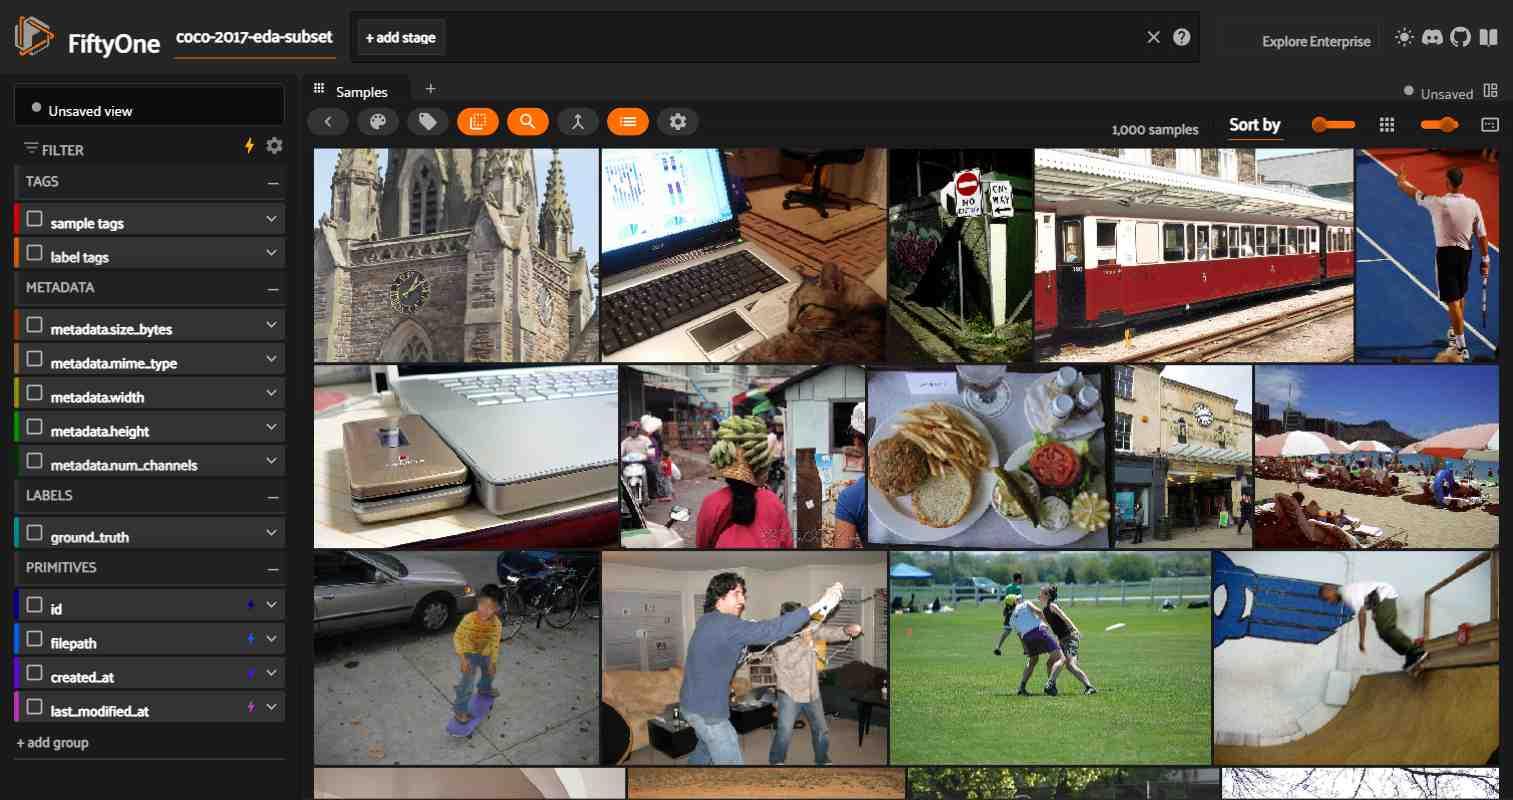

In [11]:
# Launch the FiftyOne App to explore the dataset interactively
# The session object connects your notebook to an app. You can browse, sort, and filter your data in the window.

print("Launching the FiftyOne App.")
session = fo.launch_app(dataset)

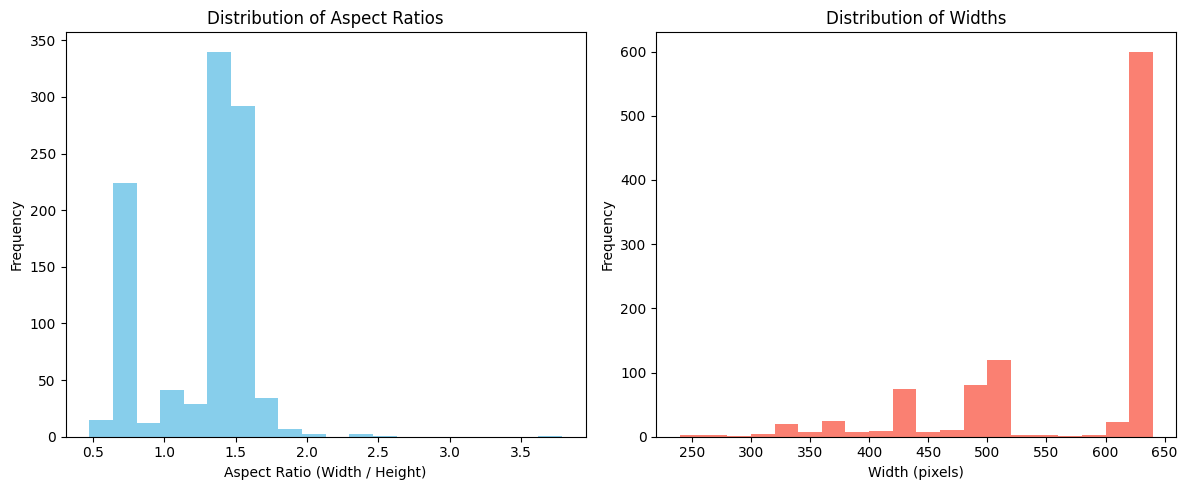

In [ ]:
# Analyze image dimensions
widths = dataset.values("metadata.width")
heights = dataset.values("metadata.height")
aspect_ratios = [w / h for w, h in zip(widths, heights)]

# Plot the distribution of image aspect ratios and widths
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(aspect_ratios, bins=20, color='skyblue')
plt.title('Distribution of Aspect Ratios')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(widths, bins=20, color='salmon')
plt.title('Distribution of Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

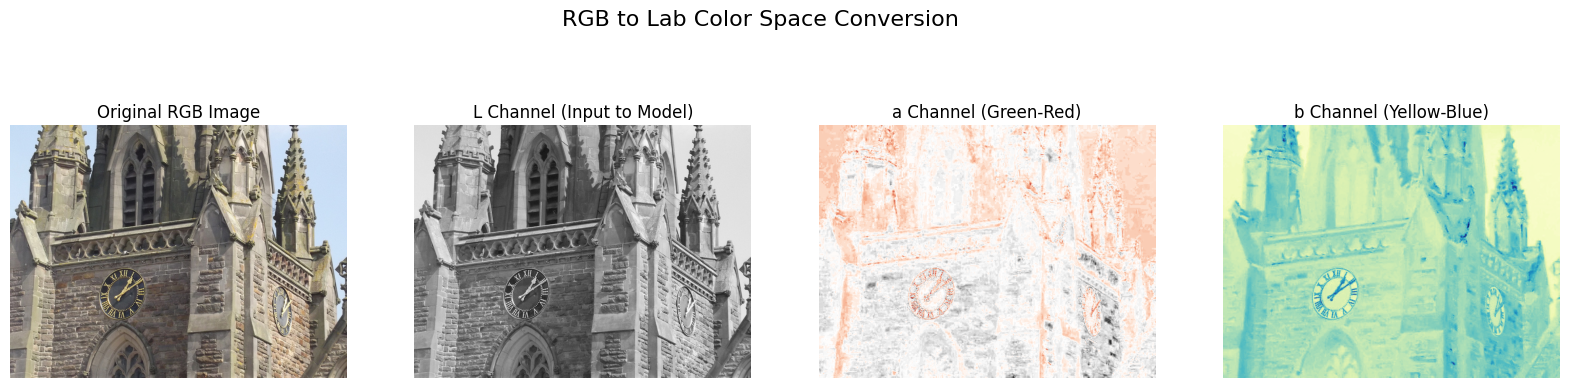

In [ ]:
sample = dataset.first()
image_path = sample.filepath

# Load the image using OpenCV
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the RGB image to Lab color space
# Normalize the RGB image to the [0, 1] range.
rgb_image_float = rgb_image.astype(np.float32) / 255.0
lab_image = cv2.cvtColor(rgb_image_float, cv2.COLOR_RGB2Lab)

# Separate the L, a, and b channels
L, a, b = cv2.split(lab_image)

# Visualize the original image and the Lab channels
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(rgb_image)
axs[0].set_title('Original RGB Image')
axs[0].axis('off')

axs[1].imshow(L, cmap='gray')
axs[1].set_title('L Channel (Input to Model)')
axs[1].axis('off')

axs[2].imshow(a, cmap='RdGy')
axs[2].set_title('a Channel (Green-Red)')
axs[2].axis('off')

axs[3].imshow(b, cmap='YlGnBu')
axs[3].set_title('b Channel (Yellow-Blue)')
axs[3].axis('off')

plt.suptitle('RGB to Lab Color Space Conversion', fontsize=16)
plt.show()